In [41]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np 
from scipy.optimize import fsolve
import scipy.integrate as integrate
import numpy.linalg as linalg
import scipy
import scipy.special
from scipy.optimize import minimize
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import scipy.stats
import scipy.linalg
import warnings
import multiprocess as mp
from smt.sampling_methods import LHS
import math
from decimal import Decimal

matplotlib.rcParams['figure.figsize'] = [15, 15]
matplotlib.rcParams.update({'font.size': 32})

In [42]:
# Load and sort the computed fitness grid
fitness_grid = np.loadtxt("./grid_for_paper.txt")
fitness_grid = fitness_grid[np.lexsort((fitness_grid[:,0],fitness_grid[:,1]))]

In [43]:
# Split and resize the grids
pred_size = int(np.sqrt(fitness_grid.shape[0]))
b_grid, Lmax_grid, fit_grid = fitness_grid[:,0].reshape(pred_size,pred_size), fitness_grid[:,1].reshape(pred_size,pred_size), np.reshape(fitness_grid[:, 2],(pred_size,pred_size))

In [44]:
# Compute the difference to the first value in a line
diff = np.zeros_like(fit_grid)
for i, row in enumerate(fit_grid.T):
    r = [(x-row[0]) for x in row]
    diff[i, :] = r

# Save max and min differences
max_diff = np.max(diff)
min_diff = np.min(diff)

# Normalize the differences (this makes the plot way prettier)
for i in range(diff.shape[0]):
    for j in range(diff.shape[1]):
        y = diff[i, j]
        if y > 0:
            diff[i, j] = y/max_diff
        if y < 0:
            diff[i, j] = -(y/min_diff)

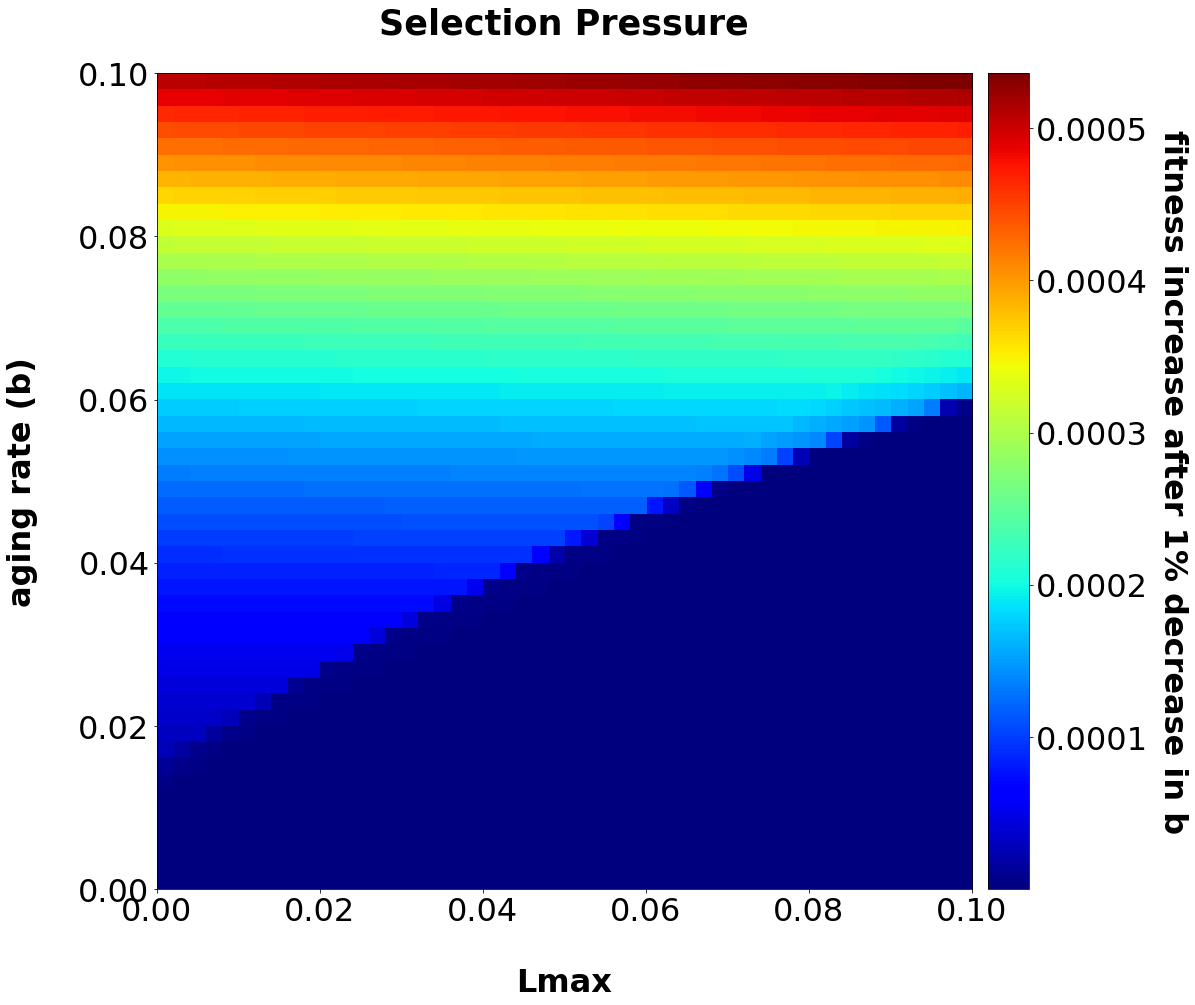

In [45]:
fig = plt.figure()
ax = plt.axes()
extent = [Lmax_grid.min(), Lmax_grid.max(), Lmax_grid.min(), Lmax_grid.max()]
im = ax.imshow(fit_grid.T, cmap="jet", interpolation="none", origin="lower", extent=extent, aspect = abs((extent[1]-extent[0])/(extent[3]-extent[2])))
axins = inset_axes(ax, width = "5%", height = "100%", loc = 'lower left',
                   bbox_to_anchor = (1.02, 0., 1, 1), bbox_transform = ax.transAxes,
                   borderpad = 0)
cbar = fig.colorbar(im, cax = axins)
# cbar.ax.tick_params(labelsize=25)
cbar.set_label('fitness increase after 1% decrease in b', rotation=270, labelpad = 40, fontweight="bold")


ax.set_ylabel("aging rate (b)", fontweight="bold", labelpad=40)
ax.set_xlabel("Lmax", fontweight="bold", labelpad=40)
ax.set_title("Selection Pressure", fontweight="bold", fontsize=35, pad=40)

ax.tick_params(axis="x") 
ax.tick_params(axis="y") 

plt.show()

path = "/home/spsalmon/images_for_paper/brass_heatmap.png"
# fig.savefig(path, dpi=300)


In [46]:
# path = "/home/spsalmon/images_for_paper/decreasing_landscape.png"
# fig.savefig(path, dpi=300)

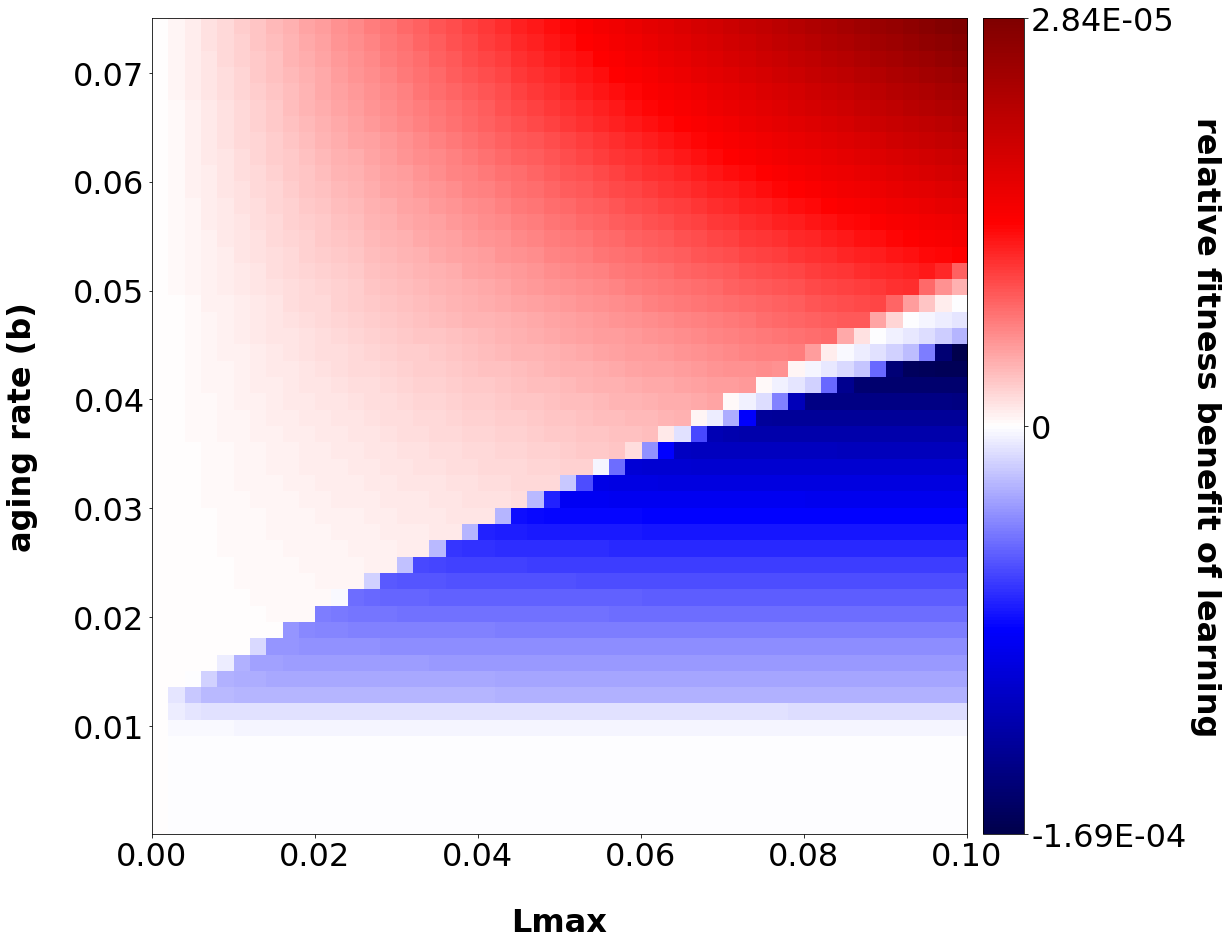

In [50]:
# final_value_with_learning = 0.04246690000000001
# final_value_without_learning = 0.03699133 

fig = plt.figure()
ax = plt.axes()
extent = [Lmax_grid.min(), Lmax_grid.max(), b_grid.min(), b_grid.max()]
im = ax.imshow(diff, cmap="seismic", interpolation="none", origin="lower", extent=extent, aspect = abs((extent[1]-extent[0])/(extent[3]-extent[2])))

axins = inset_axes(ax, width = "5%", height = "100%", loc = 'lower left',
                   bbox_to_anchor = (1.02, 0., 1, 1), bbox_transform = ax.transAxes,
                   borderpad = 0)

cbar = fig.colorbar(im, cax = axins, ticks = [-1, 0, 1])
cbar.ax.set_yticklabels(['%.2E' % Decimal(min_diff), '0', '%.2E' % Decimal(max_diff)])
cbar.set_label('relative fitness benefit of learning', rotation=270, labelpad = 35, fontweight="bold")


ax.set_ylabel("aging rate (b)", fontweight="bold", labelpad=35)
ax.set_xlabel("Lmax", fontweight="bold", labelpad=35)

# ax.scatter(0, final_value_without_learning, marker = 'x', linewidths=20)
# ax.scatter(0.1, final_value_with_learning, marker = "x", linewidths=20)


plt.show()

In [48]:
path = "/home/spsalmon/images_for_paper/brass_difference.png"
# fig.savefig(path, dpi=300)